# Estrutura dos dados

In [1]:
# importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Coloque o caminho do arquivo csv para rodar o programa

caminho_arquivo_test = '/content/drive/MyDrive/google/Colab Notebooks/turing/projeto 2/Cópia de test.csv'
df_test = pd.read_csv(caminho_arquivo_test)

caminho_arquivo_train = '/content/drive/MyDrive/google/Colab Notebooks/turing/projeto 2/Cópia de train.csv'
df = pd.read_csv(caminho_arquivo_train)


Para iniciar o projeto, devemos realizar uma breve visualização do nosso dataframe, a fim de nos familizarizarmos com os dados a serem estudados

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

As informações obtidas já nos mostram alguns problemas que teremos de lidar durante a limpeza dos dados, o que será realizado coluna por coluna adiante. 
Esses problemas são:

*   Dados faltantes nas colunas 'gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type' e 'last_new_job'
*   Predomínio de dados categóricos no dataframe, que em alguns casos podem ser substituídos por dados numéricos



In [5]:
# gera um dataframe apenas com fileiras repetidas
df[df.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


Antes de iniciar a limpeza propriamente, é necessário procurar por duplicatas no dataframe. O método utilizado acima nos mostra que não teremos problemas com duplicatas.

# Limpeza

Agora iniciaremos a limpeza dos nossos dados. Para isso, analisaremos brevemente coluna por coluna nas seções seguintes.

## Limpeza da coluna 'city'

Nesta etapa da limpeza, os métodos usados abaixo nos mostram que a coluna 'city' já está limpa.

In [6]:
df.city.describe()

count        19158
unique         123
top       city_103
freq          4355
Name: city, dtype: object

In [7]:
df.city.unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

## Limpeza da coluna city_development_index

Assim como a coluna anterior, a coluna 'city_development_index', não tem problemas

In [8]:
# descreve a coluna city_development_index do df 
df.city_development_index.describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [9]:
# verifica existência de valores incoerentes
df.city_development_index.unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

## Limpeza da coluna 'gender'

Embora a coluna 'gender' não tenha valores incorentes, ela apresenta o problema dos dados faltante. Aqui decidimos por manter as fileiras com nan a fim de evitar a perda de aproximadamente 4500 fileiras. Também optou-se por não inserir a moda (Male) nos dados faltantes, pois isso atrapalharia a análise.

In [10]:
df.gender.describe()

count     14650
unique        3
top        Male
freq      13221
Name: gender, dtype: object

In [11]:
df.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [12]:
df.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

## Limpeza da coluna relevent_experience 

Sem problemas aqui.

In [13]:
df.relevent_experience.describe()

count                       19158
unique                          2
top       Has relevent experience
freq                        13792
Name: relevent_experience, dtype: object

In [14]:
df.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

## Limpeza da coluna enrolled_university

Diante da existência de dados faltantes, decidimos inserir a moda (no_enrollment) onde não havia informações. Como não faltavam tantos dados, a análise não deve ser tão prejudicada.

In [15]:
df.enrolled_university.describe()

count             18772
unique                3
top       no_enrollment
freq              13817
Name: enrolled_university, dtype: object

In [16]:
df.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [17]:
df.enrolled_university.fillna('no_enrollment', inplace=True)

## Limpeza coluna education_level

Encaramos os dados faltantes com a mesma lógica da coluna anterior.

In [18]:
df.education_level.describe()

count        18698
unique           5
top       Graduate
freq         11598
Name: education_level, dtype: object

In [19]:
df.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [20]:
df.education_level.fillna('Graduate', inplace=True)

## Limpeza coluna major_discipline

À semelhança das colunas anteriores, inserimos a moda nos dados faltantes

In [21]:
df.major_discipline.describe()

count     16345
unique        6
top        STEM
freq      14492
Name: major_discipline, dtype: object

In [22]:
df.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [23]:
df.major_discipline.fillna('STEM', inplace=True)

## Limpeza coluna experience              

Esta coluna permitiu novamente o uso da moda nos dados faltantes.

In [24]:
df.experience.describe()

count     19093
unique       22
top         >20
freq       3286
Name: experience, dtype: object

In [25]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [26]:
df.experience.fillna('>20', inplace=True)

## Limpeza coluna company_size

Nesta coluna, a limpeza foi usada para padronizar os valores usados. Para isso, substituímos o valor 10/49 por 10-49 e o valor 10000+ por >10000

In [27]:
df.company_size.describe()

count     13220
unique        8
top       50-99
freq       3083
Name: company_size, dtype: object

In [28]:
print(df.company_size.unique())

[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']


In [29]:
df.replace(['10/49', '10000+'], ['10-49', '>10000'], inplace=True)

In [30]:
print(df.company_size.unique())

[nan '50-99' '<10' '>10000' '5000-9999' '1000-4999' '10-49' '100-500'
 '500-999']


## Limpeza coluna company_type

In [31]:
df.company_type.describe()

count       13018
unique          6
top       Pvt Ltd
freq         9817
Name: company_type, dtype: object

In [32]:
print(df.company_type.unique())

[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']


In [33]:
df.company_type.fillna('Pvt Ltd', inplace=True)

## Limpeza seção last_new_job




Aqui inserimos novamente a moda nos dados faltantes

In [34]:
df.last_new_job.describe()

count     18735
unique        6
top           1
freq       8040
Name: last_new_job, dtype: object

In [35]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [36]:
df.last_new_job.fillna('1', inplace=True)

## Limpeza coluna training_hours

A coluna training hours não apresentou problemas

In [37]:
df.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

## Limpeza coluna target

Novamente sem problemas.

In [38]:
df.target.describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

## Novo df apenas com variaveis numericas

A fim de transformar algumas das variáveis categóricas em varáveis numéricas, criamos um novo dataframe, que será chamado de df_numerico.
As variáveis compatíveis com uso de dados numéricos tiveram seus valores categóricos substituídos por números naturais, como 0, 1, 2 ...

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [40]:
# cria novo dataframe
df_numerico = df.copy()

# gender
df_numerico = df_numerico[df_numerico['gender'] != 'Other']
df_numerico.replace(['Male', 'Female'], [0.0, 1.0], inplace=True)


# relevent experience
df_numerico.replace(['No relevent experience', 'Has relevent experience'], [0, 1], inplace=True)

# enrolled_university
df_numerico.replace(['no_enrollment', 'Part time course', 'Full time course'], [0 , 1, 2], inplace=True)

# education_level
df_numerico.replace(['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], [1, 2, 3, 4, 5], 
                    inplace=True)

# experience
df_numerico = df_numerico[df_numerico['experience'] != '>20']
df_numerico = df_numerico[df_numerico['experience'] != '<1']
df_numerico['experience'] = pd.to_numeric(df_numerico['experience'], downcast="float")

# company_size
df_numerico = df_numerico[df_numerico['company_size'] != '>10000']
df_numerico.replace(['<10', '10-49', '50-99','100-500', '500-999', '1000-4999', '5000-9999'],
                    [9, 49, 99, 499, 999, 4999, 9999], 
                    inplace=True)

# last_new_job
df_numerico = df_numerico[df_numerico['last_new_job'] != '>4']
df_numerico.replace(['never'], [0], inplace=True)
df_numerico['last_new_job'] = pd.to_numeric(df_numerico['last_new_job'], downcast="float")



Note que a coluna 'company_size' teve intervalos substuídos pelo maior numero natural do respectivo intervalo. Embora isso possa prejudicar uma análise futura, essa coluna não se mostrará tão valiosa na estapa analítica.

Agora vamos remover as colunas cujas variáveis são strings

In [41]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12093 entries, 2 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12093 non-null  int64  
 1   city                    12093 non-null  object 
 2   city_development_index  12093 non-null  float64
 3   gender                  8990 non-null   float64
 4   relevent_experience     12093 non-null  int64  
 5   enrolled_university     12093 non-null  int64  
 6   education_level         12093 non-null  int64  
 7   major_discipline        12093 non-null  object 
 8   experience              12093 non-null  float32
 9   company_size            7773 non-null   float64
 10  company_type            12093 non-null  object 
 11  last_new_job            12093 non-null  float32
 12  training_hours          12093 non-null  int64  
 13  target                  12093 non-null  float64
dtypes: float32(2), float64(4), int64(5), o

In [42]:
df_numerico = df_numerico.drop(['city','major_discipline', 'company_type'], axis=1)

# Análise geral

Após a limpeza dos dados, podemos iniciar a etapa de análise.

A substituição dos dados categóricos pelos dados numéricos nos permite usar uma matriz de correlação para encontrar os valores que estão mais relacionados. O heatmap abaixo nos apresenta de forma visual essas correlações, dando destaque para a relação entre:


*   relevent experience e last new job
*   relevent experience e education level
*   target e city develpoment
*   target e enrolled university
*   target e experience






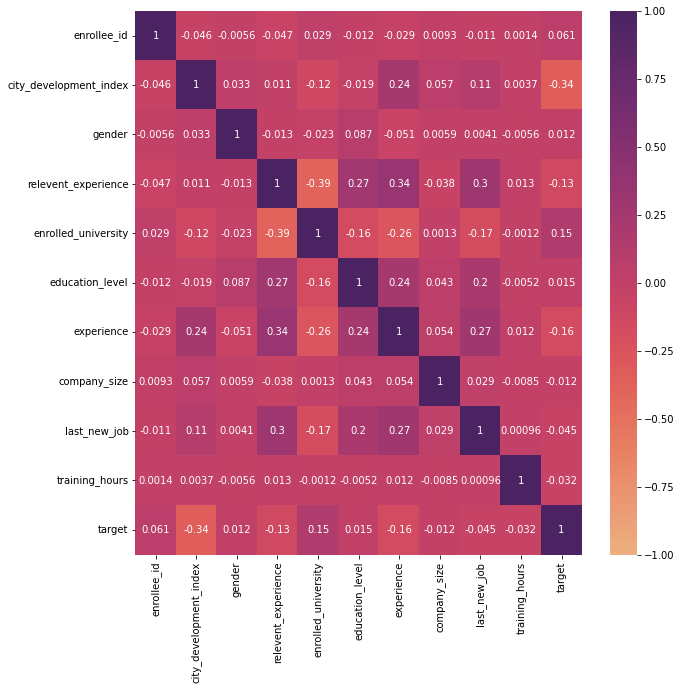

In [43]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(df_numerico.corr(), cmap="flare", vmin=-1, vmax=1, annot=True, fmt='.2g')
plt.show()

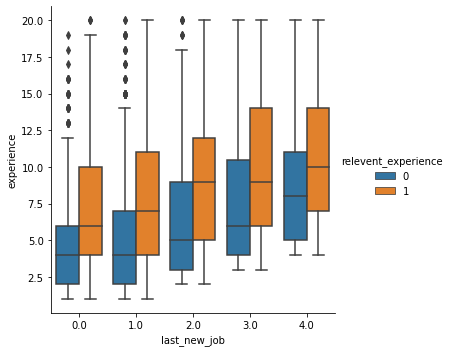

In [44]:
sns.catplot(x="last_new_job", y="experience", hue='relevent_experience', kind='box', data=df_numerico)

O gráfico acima nos mostra que as pessoas com uma maior experiência na profissão tende a ter tido um maior número de empregos no passado, assim como tendem a ter uma experiência relevante. Uma possível explicação para isso, um tanto intuitiva, seria a de que o maior tempo de experiência aumenta a chance de a pessoa ter passado por diferentes empregos e ter obtido uma experiência relevante. Afinal, um jovem na profissão tende a ter tido menos oportunidades em sua vida profissional do que um veterano.

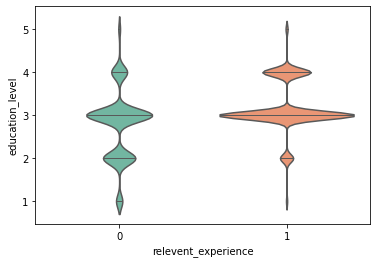

In [45]:
sns.violinplot(x="relevent_experience", y="education_level",
                    data=df_numerico, palette="Set2", split=True,
                    scale="count", inner="stick")

Esse gráfico nos mostra a existência de uma relação entre o nível de escolaridade e a experiência relevante. Ou seja, um candidato com mais estudo tende a ser valorizado pelos entrevistadores, que avaliam a educação como uma experiência relevante. Isso pode ser constatado pelo maior número de "graduates" e "masters" nos detentores de uma experiência relevante em comparação com os que não a possuem.

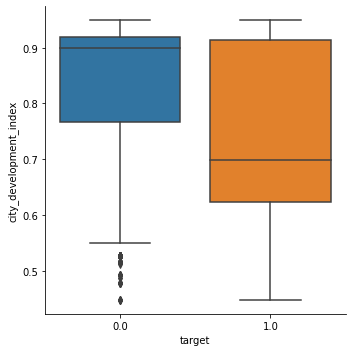

In [46]:
sns.catplot(x="target", y="city_development_index", kind='box', data=df_numerico)

Este catplot nos fornece informações ainda mais interessantes. Aqui percebemos que o 'city development index' dos trabalhadores que desejam mudar de emprego tende a ser menor do que dos que desejam se manter em seus empregos. Uma possível interpretação dessa realidade pode estar relacionada ao fato de que o desejo de mudar emprego muitas vezes está acompanhado do desejo de mudar de cidade. Ou seja, a relação do trabalhador com seu emprego depende em grande medida da sua relação com a cidade em que ele trabalha: uma cidade pouco desenvolvida pode desagradar o trabalhador, levando-o a desejar uma mudança para uma região com melhores empregos.

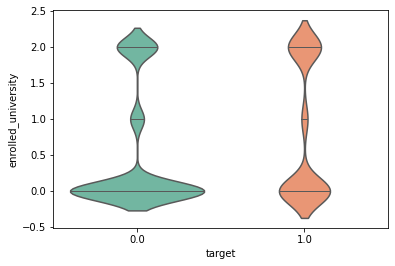

In [47]:
#enrolled university x target
sns.violinplot(x="target", y="enrolled_university",
                    data=df_numerico, palette="Set2", split=True,
                    scale="count", inner="stick")

Este violinplot nos apresenta a distribuição dos trabalhadores que desejam ou não mudar de emprego nos cursos universitários. Uma informação valiosa forncida pelo gráfico é o fato de que, entre os empregados que desejam se manter em seus empregos atuais, existe uma maior concentração de trabalhadores não matriculados em nenhum curso. Uma explicação plausível seria a de que as pessoas fora das universidades já estão mais estabelecidas no mercado de trabalho, muitas vezes já tendo obtido o auge de suas carreiras. Por outro lado, os indivíduos matriculados nos cursos universitários costumam vislumbrar uma melhora em suas qualidades de vida e, portanto, almejam uma mudança de emprego.

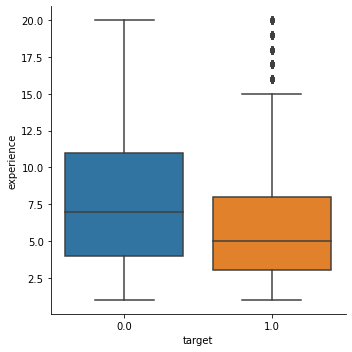

In [48]:
sns.catplot(x="target", y="experience", kind='box', data=df_numerico)

O gráfico acima demonstra uma tendência de os indivíduos que desejam se manter em seus empregos apresentarem uma maior experiência. Ou seja,o desejo pela mudança afeta predominantemente os trabalhadores em início de carreira. Podemos interpretar isso de duas formas.


1.   Com o acúmulo de experiência na profissão, os indivíduos tendem atingir postos hierarquicamente superiores, obtendo maiores salários e mais qualidade de vida. Diante das melhores condições empregatícias, o desejo pela manutenção supera o desejo pela mudança.
2.   O acúmulo de experiência está acompanhado pelo envelhecimento, de forma que os trabalhadores mais experientes costumam ter idades mais avançadas. Como se sabe, pessoas mais vezes, em comparação com a mais jovens, tendem almejar a pacatez em suas vidas, em detrimento da mudança constante. Assim, os indivíduos mais velhos e experientes costumam desejar manter-se em seus empregos atuais.







# Modelos de predição

## Regressão logística

### Importar bibliotecas

In [57]:
from sklearn.model_selection import train_test_split  # separação entre base de treino e de teste
from sklearn.linear_model import LogisticRegression # segundo modelo que usaremos

### Divisão do dataset em treino e teste

In [58]:
# limpa de infinito e dados faltantes
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def clean_dataset(df_numerico):
    assert isinstance(df_numerico, pd.DataFrame), "df needs to be a pd.DataFrame"
    df_numerico.dropna(inplace=True)
    indices_to_keep = ~df_numerico.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_numerico[indices_to_keep].astype(np.float64)

df_regressao = clean_dataset(df_numerico)

In [59]:
X = df_regressao.drop('target', axis=1) # Cria uma cópia do dataset sem a target
y = df_regressao['target']

# Reservamos 20% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(4747, 10)
(1187, 10)


### Treinar o modelo

In [60]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Avaliar modelo

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix


In [62]:
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácia no treino: 0.8123025068464294
Acurácia no teste: 0.8256107834877844


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


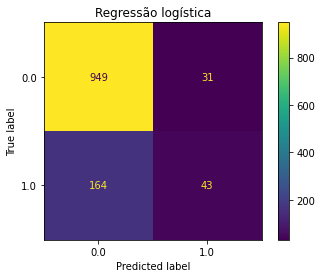

In [76]:
plot_confusion_matrix(logreg.fit(X_train, y_train), X_test, y_test, values_format='d')
plt.title('Regressão logística')

plt.show()

In [77]:
modelo = logreg.fit(X_train, y_train)
y_pred1 = modelo.predict(X_test)
print('Modelo de regressão logística')
print(classification_report(y_test, y_pred1))

Modelo de regressão logística
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       980
         1.0       0.58      0.21      0.31       207

    accuracy                           0.84      1187
   macro avg       0.72      0.59      0.61      1187
weighted avg       0.81      0.84      0.80      1187



Embora a acurácia do modelo tenha sido de aproximadamente 82,5% no treino, as demias métricas nos mostram que o modelo não tão bom assim para aquilo que ele foi desenhado. O valor da precisão e do recall deixaram bastante a desejar na predição do desejo de se mudar de emprego: a precisão de 0.58 para o 1.0 inidca que apenas 58% dos classificado como interessados em um novo emprego de fato o estão procurando. Além disso, o recall de 0.21 nos diz que apenas 21% dos interessados em um novo emprego foram classificados como tal.
Em suma, a acurácia do modelo não é suficiente para avaliar o seu propósito final de prever quem está interessado em um novo emprego.
Um dos motivos de a acurácia nos ter 'enganado' decorre do fato de que o nosso modelo classificou a maioria dos indivuos como '0' e, de fato, a maioria dos indivíduos não está procurando um novo emprego. Contudo, a alta capacidade de o modelo prever quem não está procurando um novo emprego não traduz uma alta capacidade de predição de quem está procurando um emprego.

## KNN

### Importar biblioteca


In [65]:
# Modelo de classificação
from sklearn.neighbors import KNeighborsClassifier

# Treinamento e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Divisão do dataset em treino e teste

In [66]:
# cria novo dataframe apenas com colunas desejadas
df_KNN = df_numerico[['city_development_index', 'enrolled_university', 'experience', 'target']].copy()


In [67]:
df_KNN.head()

,city_development_index,enrolled_university,experience,target
6,0.920,0,5.0,0.0
8,0.920,0,7.0,1.0
11,0.920,0,5.0,0.0
20,0.843,0,11.0,0.0
21,0.926,0,11.0,0.0


In [68]:
# limpa de infinito e dados faltantes
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def clean_dataset(df_numerico):
    assert isinstance(df_numerico, pd.DataFrame), "df needs to be a pd.DataFrame"
    df_numerico.dropna(inplace=True)
    indices_to_keep = ~df_numerico.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_numerico[indices_to_keep].astype(np.float64)

df_KNN = clean_dataset(df_KNN)

In [69]:
X = df_KNN.drop('target', axis=1) # Cria uma cópia do dataset sem a target
y = df_KNN['target']

# Reservamos 20% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

### Treinamento do modelo

In [83]:
your_K = 9
model = KNeighborsClassifier(n_neighbors = your_K)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(y_predict)

[0. 0. 1. ... 0. 0. 0.]


### Em busca do K otimo

In [71]:
k_range = range(1, 300)
scores = {}
scores_list = []
for k in k_range:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores[k] = accuracy_score(y_test, y_predict)
  scores_list.append(accuracy_score(y_test, y_predict))

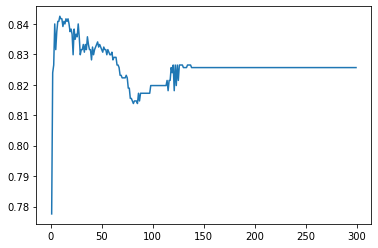

In [72]:
plt.figure
plt.plot(k_range, scores_list)

### Avaliação do modelo


In [80]:
print(accuracy_score(y_test, y_predict))

0.8256107834877844


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


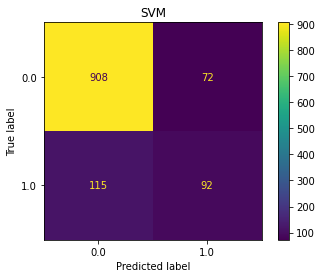

In [84]:
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test, values_format='d')
plt.title('SVM')

plt.show()

In [85]:
modelo = model.fit(X_train, y_train)
y_pred1 = modelo.predict(X_test)
print('SVM')
print(classification_report(y_test, y_pred1))

SVM
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       980
         1.0       0.56      0.44      0.50       207

    accuracy                           0.84      1187
   macro avg       0.72      0.69      0.70      1187
weighted avg       0.83      0.84      0.84      1187



Embora o modelo SVM tenha apresentado valores maiores de precisão e de recall, eles ainda são consideravelmente baixos: apenas 56% dos classificados como desejantes de um novo emprego de fato estão a procura de um novo local para trabalhar e apenas 44% dos que estão procurando um novo emprego foram classificados como tal.